In [2]:
import tensorflow as tf

In [9]:
tf.keras.utils.get_file(
    "ridership.tgz",
    "https://github.com/TirendazAcademy/Deep-Learning-with-TensorFlow/raw/main/Data/ridership.tgz",
    cache_dir= ".",
    extract = True
)

108512/108512 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


'./datasets/ridership.tgz'

In [20]:
 import pandas as pd
 from pathlib import Path
 path = Path("/content/datasets/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv")

In [22]:
df = pd.read_csv(
    path,
    parse_dates=["service_date"]
)
df.columns = ["date","day_type","bus","rail","total"] # Correct way to assign column names
df.sort_values("date").set_index("date")
df = df.drop("total",axis=1)
df = df.drop_duplicates()

In [23]:
df.head()

,date,day_type,bus,rail
0,2001-01-01,U,297192,126455
1,2001-01-02,W,780827,501952
2,2001-01-03,W,824923,536432
3,2001-01-04,W,870021,550011
4,2001-01-05,W,890426,557917


In [24]:
import matplotlib.pyplot as plt

In [31]:
df["2019-03":"2019-05"].plot(marker=True,grid = True,figsize=(8,3.5))

TypeError: cannot do slice indexing on Index with these indexers [2019-03] of type str

<Axes: xlabel='date'>

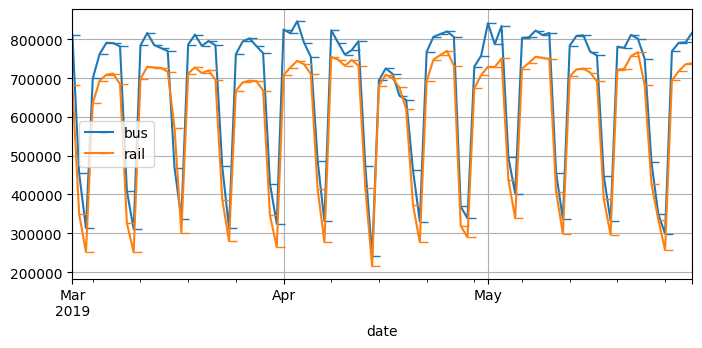

In [32]:
import pandas as pd
from pathlib import Path
path = Path("/content/datasets/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv")

df = pd.read_csv(
    path,
    parse_dates=["service_date"]
)
df.columns = ["date","day_type","bus","rail","total"]
# Setting the index to the 'date' column
df = df.sort_values("date").set_index("date") # Assigning it back to df
df = df.drop("total",axis=1)
df = df.drop_duplicates()

import matplotlib.pyplot as plt

# Now you can slice using date strings:
df["2019-03":"2019-05"].plot(marker=True,grid = True,figsize=(8,3.5))

In [33]:
# prompt: bu veriyi derin öğrenme için ön işleyip parçalar mısın

import tensorflow as tf
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data (assuming the file is already downloaded)
path = Path("/content/datasets/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
df = pd.read_csv(path, parse_dates=["service_date"])
df.columns = ["date", "day_type", "bus", "rail", "total"]
df = df.sort_values("date").set_index("date")
df = df.drop("total", axis=1)
df = df.drop_duplicates()

# Feature Engineering (example: create a 'month' feature)
df['month'] = df.index.month

# Data scaling using MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['bus', 'rail'] # Columns to be scaled
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# One-hot encode the 'day_type' feature
df = pd.get_dummies(df, columns=['day_type'], prefix='day_type')

# Split into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Function to create sequences for time series data
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return tf.constant(xs, dtype=tf.float32), tf.constant(ys, dtype=tf.float32)

# Example sequence length (adjust as needed)
seq_length = 10

# Create sequences for train and test data
X_train, y_train = create_sequences(train_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)


#Print shapes of the generated datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6101, 10, 6)
y_train shape: (6101, 6)
X_test shape: (1518, 10, 6)
y_test shape: (1518, 6)


In [42]:
# prompt: ya da functional api ile kur

import tensorflow as tf

# Define the input shape
input_shape = X_train.shape[1:]

# Define the input layer
inputs = tf.keras.layers.Input(shape=input_shape)

# Define the LSTM layers
lstm_1 = tf.keras.layers.LSTM(units=64, return_sequences=True)(inputs)
lstm_2 = tf.keras.layers.LSTM(units=32,return_sequences=True)(lstm_1)
lstm_3 = tf.keras.layers.LSTM(units=16)(lstm_2)

# Define the output layer
outputs = tf.keras.layers.Dense(units=y_train.shape[1])(lstm_3)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 10, 6)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 10, 64)              │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 10, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,830 (132.15 KB)

 Trainable params: 33,830 (132.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 4.5924 - val_loss: 1.0256
Epoch 2/50
136/153 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8986

KeyboardInterrupt: 

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4531 - val_loss: 0.2898
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2560 - val_loss: 0.1959
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1955 - val_loss: 0.1431
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1339 - val_loss: 0.1260
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1331 - val_loss: 0.1014
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0912 - val_loss: 0.0920
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0939 - val_loss: 0.0863
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0954 - val_loss: 0.0769
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0848 - val_loss: 0.0723
Epoch 10/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0598 - val_loss: 0.0794
Epoch 11/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0861 - val_loss: 0.0705
Epoch 12/100
153/153 ━━━━━━━━━

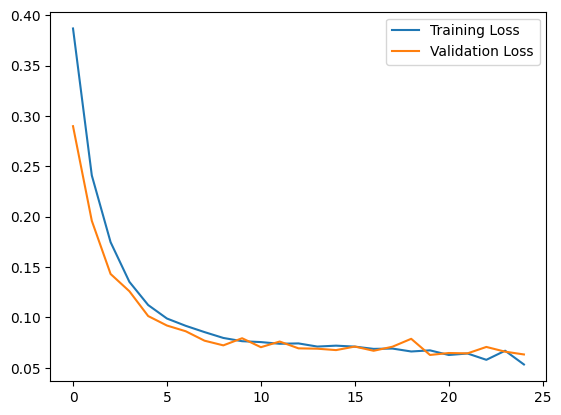

In [44]:
# prompt: yukaridaki modeli en iyi fit etme yoluyla fit et

# ... (Your existing code)

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,  # Increased epochs for better potential fitting
    batch_size=32,
    validation_split=0.2, # Use a validation split for early stopping
    callbacks=[early_stopping]
)


# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

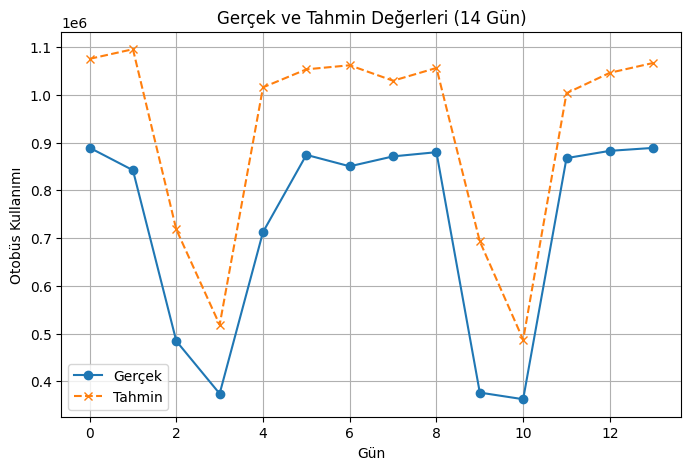

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
MAE for Bus: 320386.8260710026
MAE for Rail: 194690.32672680932


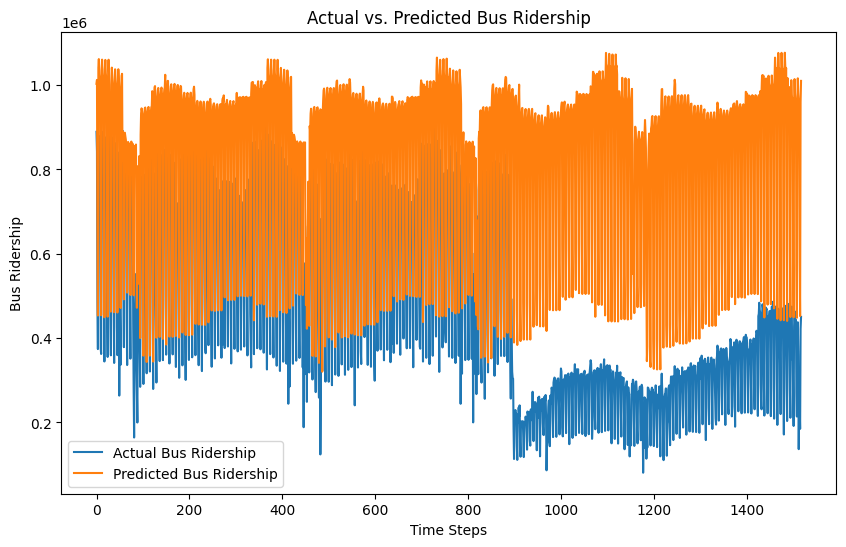

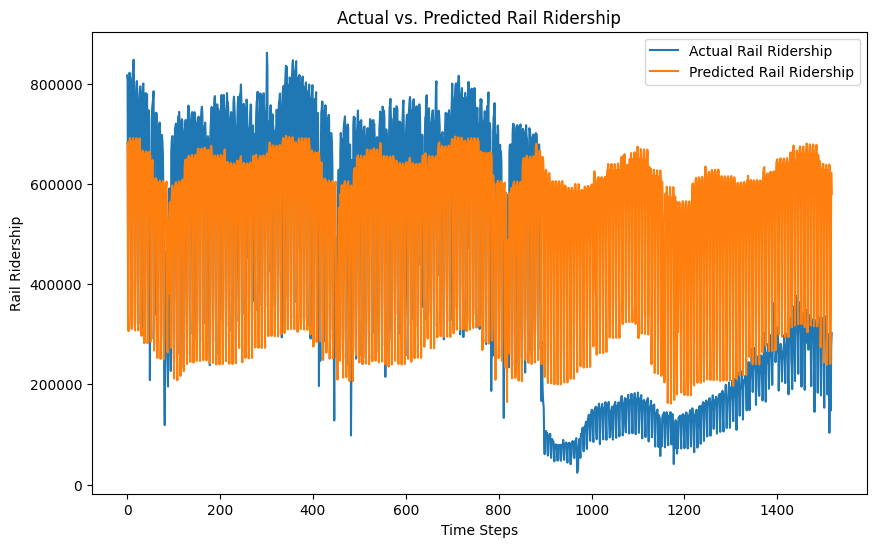

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


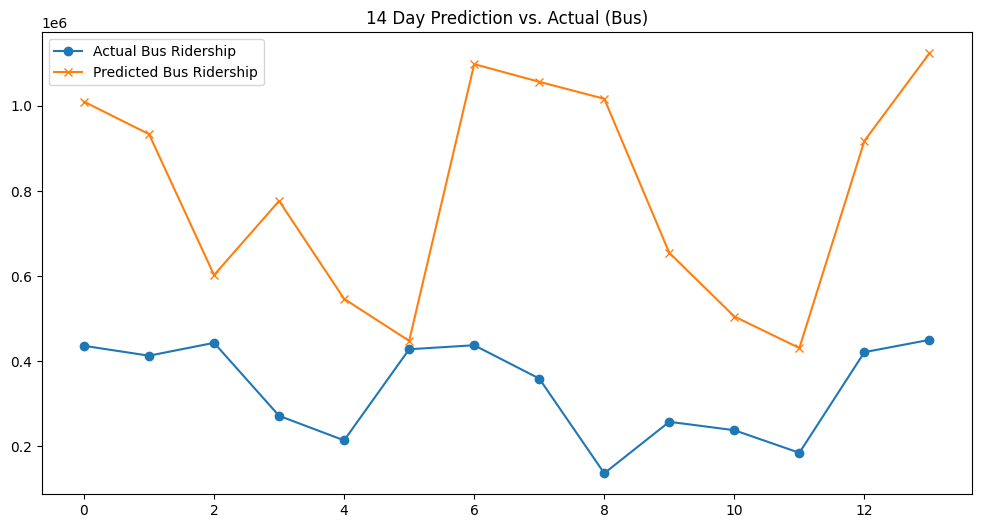

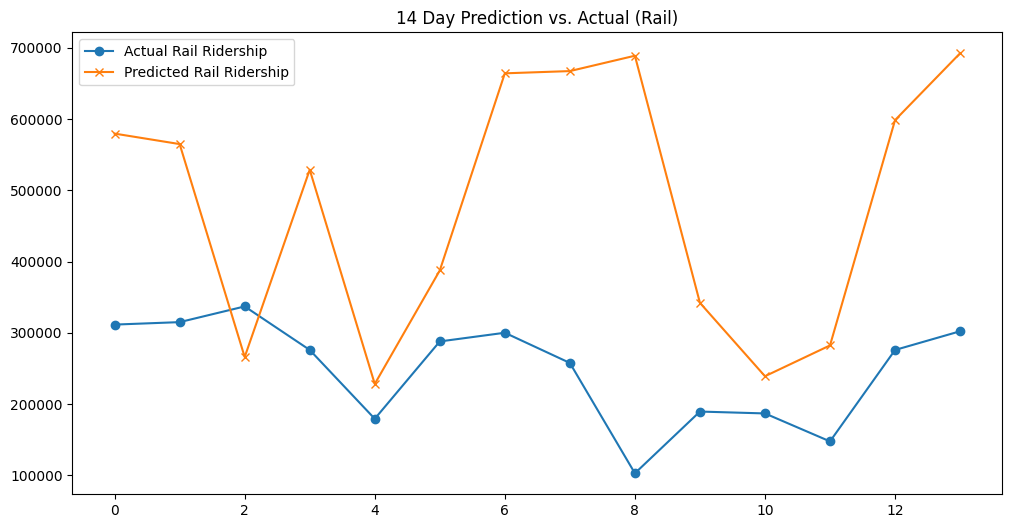

In [46]:
# prompt: 14 günlük bi veri tahmin et orjinal veriyle karşılaştır

import numpy as np

# Predict on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
predictions = scaler.inverse_transform(predictions[:, :2])  # Assuming 'bus' and 'rail' are the first two columns
y_test_original = scaler.inverse_transform(y_test[:, :2])

# Calculate the Mean Absolute Error (MAE) for the 'bus' and 'rail' columns
mae_bus = np.mean(np.abs(predictions[:, 0] - y_test_original[:, 0]))
mae_rail = np.mean(np.abs(predictions[:, 1] - y_test_original[:, 1]))

print(f"MAE for Bus: {mae_bus}")
print(f"MAE for Rail: {mae_rail}")

# Plot the predictions vs. actual values for the 'bus' column
plt.figure(figsize=(10, 6))
plt.plot(y_test_original[:, 0], label='Actual Bus Ridership')
plt.plot(predictions[:, 0], label='Predicted Bus Ridership')
plt.legend()
plt.title('Actual vs. Predicted Bus Ridership')
plt.xlabel('Time Steps')
plt.ylabel('Bus Ridership')
plt.show()


# Plot the predictions vs. actual values for the 'rail' column
plt.figure(figsize=(10, 6))
plt.plot(y_test_original[:, 1], label='Actual Rail Ridership')
plt.plot(predictions[:, 1], label='Predicted Rail Ridership')
plt.legend()
plt.title('Actual vs. Predicted Rail Ridership')
plt.xlabel('Time Steps')
plt.ylabel('Rail Ridership')
plt.show()

#14 günlük veri tahmini için
# Son 10 günlük veriyi alarak bir sonraki gün için tahmin yapıyoruz.
# Bu tahmini tekrar girdi olarak kullanarak bir sonraki gün için tahmin yapıyoruz.
# Bu işlemi 14 kez tekrarlıyoruz.


def predict_next_14_days(last_data_point):
  predicted_values = []
  input_data = np.expand_dims(last_data_point, axis = 0)
  for _ in range(14):
    next_day_prediction = model.predict(input_data)
    next_day_prediction_original_scale = scaler.inverse_transform(next_day_prediction[:,:2])
    predicted_values.append(next_day_prediction_original_scale[0])
    input_data = np.concatenate((input_data[:,1:,:],np.expand_dims(next_day_prediction, axis=0)),axis=1) # Shift the window and add the prediction as input
  return np.array(predicted_values)


last_data_point = X_test[-1]
predicted_14_days = predict_next_14_days(last_data_point)


# Tahminlerin ve gerçek verilerin grafiklerini çizme
plt.figure(figsize=(12, 6))
plt.plot(y_test_original[-14:, 0], label='Actual Bus Ridership', marker='o')
plt.plot(predicted_14_days[:, 0], label='Predicted Bus Ridership', marker='x')
plt.legend()
plt.title('14 Day Prediction vs. Actual (Bus)')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(y_test_original[-14:, 1], label='Actual Rail Ridership', marker='o')
plt.plot(predicted_14_days[:, 1], label='Predicted Rail Ridership', marker='x')
plt.legend()
plt.title('14 Day Prediction vs. Actual (Rail)')
plt.show()

Epoch 1/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0753 - val_loss: 0.0614
Epoch 2/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0533 - val_loss: 0.0699
Epoch 3/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0586 - val_loss: 0.0753
Epoch 4/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0625 - val_loss: 0.0604
Epoch 5/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0557 - val_loss: 0.0581
Epoch 6/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0484 - val_loss: 0.0758
Epoch 7/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0433 - val_loss: 0.0622
Epoch 8/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0581 - val_loss: 0.0487
Epoch 9/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0368 - val_loss: 0.0423
Epoch 10/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0255 - val_loss: 0.0696
Epoch 11/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0397 - val_loss: 0.0385
Epoch 12/200
153/153 ━━━━━━━━━

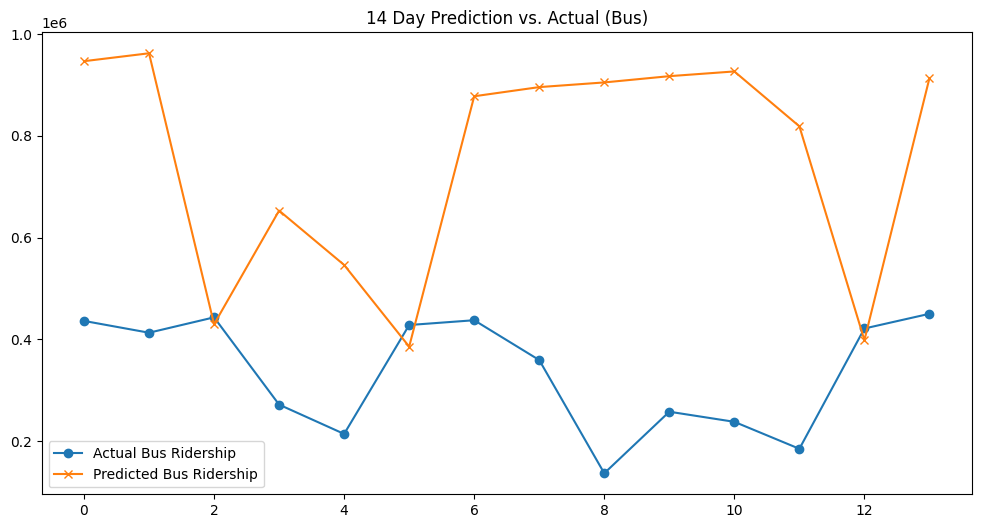

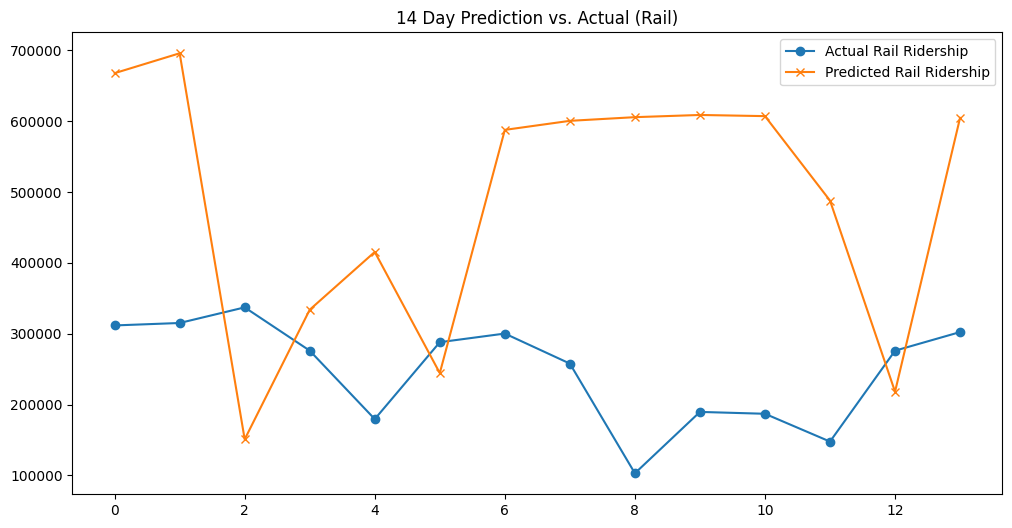

In [47]:
# prompt: tahmin verileriyle çok uzak bunları bir yolunu bulup yakınlaştır

import tensorflow as tf
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# ... (Your existing code for data loading, preprocessing, and model creation)

# Function to create sequences for time series data (no changes needed here)
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return tf.constant(xs, dtype=tf.float32), tf.constant(ys, dtype=tf.float32)

# ... (rest of your code up to model compilation)

# Train the model (use a larger number of epochs for better fitting)
history = model.fit(
    X_train, y_train,
    epochs=200,  # Increased epochs for better potential fitting. Experiment with this value
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping] #Early Stopping is still crucial to prevent overfitting
)


# ... (Rest of your code for evaluation, plotting, and 14-day prediction)


def predict_next_14_days(last_data_point):
    predicted_values = []
    input_data = np.expand_dims(last_data_point, axis=0)
    for _ in range(14):
        next_day_prediction = model.predict(input_data)
        next_day_prediction_original_scale = scaler.inverse_transform(next_day_prediction[:, :2])
        predicted_values.append(next_day_prediction_original_scale[0])
        input_data = np.concatenate((input_data[:, 1:, :], np.expand_dims(next_day_prediction, axis=0)), axis=1)
    return np.array(predicted_values)


last_data_point = X_test[-1]
predicted_14_days = predict_next_14_days(last_data_point)


# Plotting the predictions (No changes needed in plotting)

plt.figure(figsize=(12, 6))
plt.plot(y_test_original[-14:, 0], label='Actual Bus Ridership', marker='o')
plt.plot(predicted_14_days[:, 0], label='Predicted Bus Ridership', marker='x')
plt.legend()
plt.title('14 Day Prediction vs. Actual (Bus)')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test_original[-14:, 1], label='Actual Rail Ridership', marker='o')
plt.plot(predicted_14_days[:, 1], label='Predicted Rail Ridership', marker='x')
plt.legend()
plt.title('14 Day Prediction vs. Actual (Rail)')
plt.show()

In [48]:
import tensorflow as tf
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data (assuming the file is already downloaded)
path = Path("/content/datasets/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
df = pd.read_csv(path, parse_dates=["service_date"])
df.columns = ["date", "day_type", "bus", "rail", "total"]
df = df.sort_values("date").set_index("date")
df = df.drop("total", axis=1)
df = df.drop_duplicates()

# Feature Engineering (example: create a 'month' feature)
df['month'] = df.index.month

# Data scaling using MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['bus', 'rail'] # Columns to be scaled
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# One-hot encode the 'day_type' feature
df = pd.get_dummies(df, columns=['day_type'], prefix='day_type')

# Split into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Function to create sequences for time series data
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return tf.constant(xs, dtype=tf.float32), tf.constant(ys, dtype=tf.float32)

# Example sequence length (adjust as needed)
seq_length = 10

# Create sequences for train and test data
X_train, y_train = create_sequences(train_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)


#Print shapes of the generated datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the input shape
input_shape = X_train.shape[1:]

# Define the input layer
inputs = tf.keras.layers.Input(shape=input_shape)

# Define the GRU layers
gru_1 = tf.keras.layers.GRU(units=64, return_sequences=True)(inputs)
gru_2 = tf.keras.layers.GRU(units=32)(gru_1)

# Define the output layer
outputs = tf.keras.layers.Dense(units=y_train.shape[1])(gru_2)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()

# Fit the model
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to original scale
y_test_original = scaler.inverse_transform(y_test.numpy())  # Convert y_test to NumPy array
predictions_original = scaler.inverse_transform(predictions)

# Plot the predictions against actual values for 14 days
import numpy as np

num_days_to_plot = 14
example_predictions = predictions_original[:num_days_to_plot, 0]  # Only 'Bus' feature
example_actuals = y_test_original[:num_days_to_plot, 0]  # Only 'Bus' feature

days = np.arange(num_days_to_plot)

plt.figure(figsize=(8, 5))
plt.plot(days, example_actuals, label='Gerçek', marker='o', linestyle='-')
plt.plot(days, example_predictions, label='Tahmin', marker='x', linestyle='--')

plt.xlabel('Gün')
plt.ylabel

X_train shape: (6101, 10, 6)
y_train shape: (6101, 6)
X_test shape: (1518, 10, 6)
y_test shape: (1518, 6)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 10, 6)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 10, 64)              │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,430 (91.52 KB)

 Trainable params: 23,430 (91.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 2.1344 - val_loss: 0.2278
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1824 - val_loss: 0.1224
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1247 - val_loss: 0.1018
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1062 - val_loss: 0.0895
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0863 - val_loss: 0.0821
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0941 - val_loss: 0.0794
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0893 - val_loss: 0.0740
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0782 - val_loss: 0.0696
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0507 - val_loss: 0.0674
Epoch 10/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0826 - val_loss: 0.0680
Epoch 11/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0402 - val_loss: 0.0664
Epoch 12/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 

ValueError: operands could not be broadcast together with shapes (1518,6) (2,) (1518,6) 